In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.ops.losses.losses_impl import mean_squared_error
%matplotlib inline

# Read record into dataframe
data = pd.read_csv('athlete_events.csv')
data.shape # (271116, 15)
# data.head()

# Only interested in predicting for Summer Olympics
data = data[data['Season'] == 'Summer']
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [183]:
# Read NOC Region csv to df
noc_regions = pd.read_csv('noc_regions.csv')
noc_regions.shape # (230, 3)
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [184]:
# Merge the two dataframes on NOC col
merged_data = data.merge(noc_regions, how='left', on='NOC')
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [185]:
# Find out the earliest and the latest year of the record
year_data = data['Year']
year_data.head()

max_year = year_data.max()
min_year = year_data.min()

distinct_year_list = year_data.unique().tolist()
distinct_year_list = sorted(distinct_year_list)
print(f'max_year: {max_year}')
print(f'min_year: {min_year}')
print(f'total number of years: {max_year - min_year}')
print(f'distinct_year_list: {distinct_year_list}')


max_year: 2016
min_year: 1896
total number of years: 120
distinct_year_list: [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [186]:
# Find out the distinct values of medal
distinct_medals = data['Medal'].unique()
print(distinct_medals)

[nan 'Gold' 'Bronze' 'Silver']


In [187]:
# Get the total number of gold, for the USA for each year
# 01 - Note that for team event, there is 1 gold medal to each team member
# 02 - Therefore, we have to partition by year and event -> count each unique event as 1 gold
usa_gold_medals = merged_data[(merged_data['Team'] == 'United States') & (merged_data['Medal'] == 'Gold')]
usa_gold_medal_count = usa_gold_medals.groupby(by=['Year', 'Event']).size().reset_index(name='Gold Medals')
usa_gold_medal_count_per_year = usa_gold_medal_count.groupby('Year')['Gold Medals'].size().reset_index(name='Gold Medals')
usa_gold_medal_count_per_year = usa_gold_medal_count_per_year.sort_values(by='Year', ascending=False)
usa_gold_medal_count_per_year.head()

,Year,Gold Medals
27,2016,45
26,2012,43
25,2008,33
24,2004,35
23,2000,35


In [188]:
# Get the total number of gold, for China for each year
china_gold_medals = merged_data[(merged_data['Team'] == 'China') & (merged_data['Medal'] == 'Gold')]
china_gold_medal_count = china_gold_medals.groupby(by=['Year', 'Event']).size().reset_index(name='Gold Medals')
china_gold_medal_count_per_year = china_gold_medal_count.groupby('Year')['Gold Medals'].size().reset_index(name='Gold Medals')
china_gold_medal_count_per_year = china_gold_medal_count_per_year.sort_values(by='Year', ascending=False)
china_gold_medal_count_per_year.head()

,Year,Gold Medals
8,2016,25
7,2012,35
6,2008,50
5,2004,27
4,2000,24


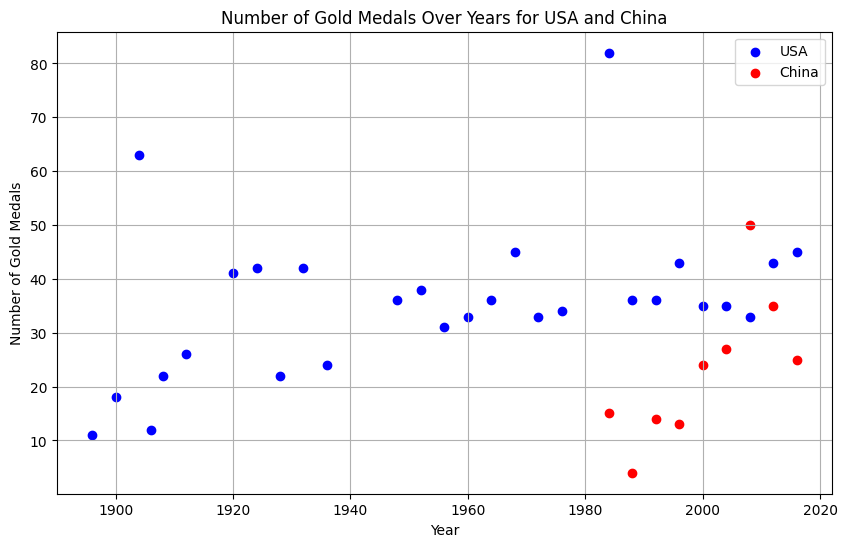

In [189]:
# Plot the existing data for visualization 
plt.figure(figsize=(10, 6))

plt.scatter(usa_gold_medal_count_per_year['Year'], usa_gold_medal_count_per_year['Gold Medals'], color='blue', label='USA')
plt.scatter(china_gold_medal_count_per_year['Year'], china_gold_medal_count_per_year['Gold Medals'], color='red', label='China')

plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.title('Number of Gold Medals Over Years for USA and China')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

# Prepare and split the data for USA
X_usa = usa_gold_medal_count_per_year[['Year']].values
y_usa = usa_gold_medal_count_per_year['Gold Medals'].values
X_usa_train, X_usa_test, y_usa_train, y_usa_test = train_test_split(X_usa, y_usa, test_size=0.2, random_state=42)

# Prepare and split the data for China
X_china = china_gold_medal_count_per_year[['Year']].values
y_china = china_gold_medal_count_per_year['Gold Medals'].values 
X_china_train, X_china_test, y_china_train, y_china_test = train_test_split(X_china, y_china, test_size=0.2, random_state=42)

In [191]:
from utils import compute_cost

# 1 - Linear Regression - Manual Implementation
# 1.1 - Compute cost with some initial values for parameters w, b
initial_w = 2
initial_b = 1

cost_usa = compute_cost(X_usa_train, y_usa_train, initial_w, initial_b)
print(f'cost_usa: {cost_usa}')

cost_china = compute_cost(X_china_train, y_china_train, initial_w, initial_b)
print(f'cost_china: {cost_china}')

cost_usa: [7522843.72727273]
cost_china: [7908383.07142857]


In [192]:
from utils import compute_gradient

# 1.2 - Compute gradient
initial_w = 0
initial_b = 0

tmp_dj_dw_usa, tmp_dj_db_usa = compute_gradient(X_usa_train, y_usa_train, initial_w, initial_b)
print('USA - Gradient at initial w, b (zeros):', tmp_dj_dw_usa, tmp_dj_db_usa)

tmp_dj_dw_china, tmp_dj_db_china = compute_gradient(X_china_train, y_china_train, initial_w, initial_b)
print('China - Gradient at initial w, b (zeros):', tmp_dj_dw_china, tmp_dj_db_china)

USA - Gradient at initial w, b (zeros): [-62078.72727273] [-31.63636364]
China - Gradient at initial w, b (zeros): [-48072.] [-24.]


In [193]:
from importlib import reload
import utils

# To reload utils as we are making changes to the functions in utils
reload(utils)

<module 'utils' from '/Users/limzhengyang/Desktop/ml-playground/olympics-prediction/utils.py'>

In [194]:
from utils import gradient_descent
import math
from sklearn.preprocessing import StandardScaler

# 1.3 - Scale features
scaler_usa = StandardScaler()
X_usa_train_scaled = scaler_usa.fit_transform(X_usa_train.reshape(-1, 1))

scaler_china = StandardScaler()
X_china_train_scaled = scaler_china.fit_transform(X_china_train.reshape(-1, 1))

# 1.4 - Batch gradient descent
initial_w = 0.
initial_b = 0.

iterations = 10000
alpha = 0.01

w_usa, b_usa, _, _ = gradient_descent(X_usa_train_scaled, y_usa_train, initial_w, initial_b, 
                                      compute_cost, compute_gradient, alpha, iterations)
print(f'w_usa,b_usa found by gradient descent:, {w_usa}, {b_usa}')

w_china, b_china, _, _ = gradient_descent(X_china_train_scaled, y_china_train, initial_w, initial_b, 
                                          compute_cost, compute_gradient, alpha, iterations)
print(f'w_china,b_china found by gradient descent:, {w_china}, {b_china}')

w_usa,b_usa found by gradient descent:, [6.60884743], [31.63636364]
w_china,b_china found by gradient descent:, [7.34846923], [24.]


/var/folders/w7/bnb_cjt16px5nlp218wwd25w0000gn/T/ipykernel_11108/775433510.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_usa[i] = w_usa * X_usa_train_scaled[i] + b_usa
/var/folders/w7/bnb_cjt16px5nlp218wwd25w0000gn/T/ipykernel_11108/775433510.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_china[i] = w_china * X_china_train_scaled[i] + b_china


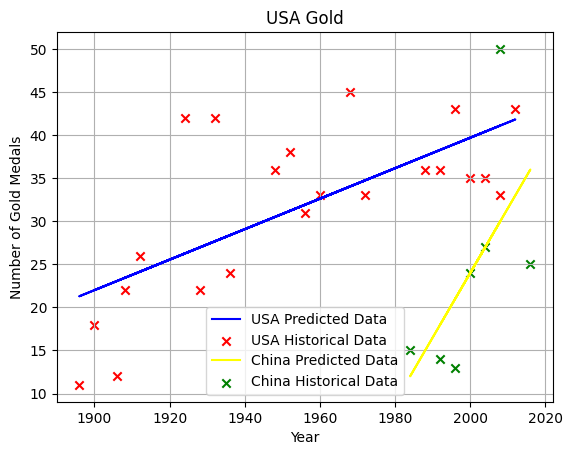

In [195]:
# 1.5 - Use final parameters from gradient descent to plot linear fit
m_usa = X_usa_train.shape[0]
predicted_usa = np.zeros(m_usa)

for i in range(m_usa):
    predicted_usa[i] = w_usa * X_usa_train_scaled[i] + b_usa

m_china = X_china_train.shape[0]
predicted_china = np.zeros(m_china)

for i in range(m_china):
    predicted_china[i] = w_china * X_china_train_scaled[i] + b_china
    
# Plot the linear fit - USA
plt.plot(X_usa_train, predicted_usa, color= "blue", label='USA Predicted Data')

# Create a scatter plot of the data. 
plt.scatter(X_usa_train, y_usa_train, marker='x', color='red', label='USA Historical Data') 

plt.title("USA Gold")
plt.ylabel('Number of Gold Medals')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

# Plot the linear fit - China
plt.plot(X_china_train, predicted_china, color='yellow', label='China Predicted Data')

# Create a scatter plot of the data. 
plt.scatter(X_china_train, y_china_train, marker='x', color='green', label='China Historical Data') 

plt.title("USA Gold")
plt.ylabel('Number of Gold Medals')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

In [196]:
# 1.6 - Predict the number of gold won by USA and China in 2050
year_2050_scaled = scaler_usa.transform([[2050]])
prediction_usa = year_2050_scaled[0] * w_usa + b_usa
usa_2030_prediction_manual_impl = round(prediction_usa[0])
print(f'Predicted number of gold won by USA: {usa_2030_prediction_manual_impl}')

year_2050_scaled_china = scaler_china.transform([[2050]])
prediction_china = year_2050_scaled_china[0] * w_china + b_china
china_2030_prediction_manual_impl = round(prediction_china[0])
print(f'Predicted number of gold won by China: {china_2030_prediction_manual_impl}')

Predicted number of gold won by USA: 49
Predicted number of gold won by China: 61


In [197]:
from sklearn.linear_model import LinearRegression

# 2 - Linear Regression - SKLearn
# 2.1 - Initialize the linear regression model
linear_regression_model_usa = LinearRegression().fit(X_usa_train, y_usa_train)
linear_regression_model_china = LinearRegression().fit(X_china_train, y_china_train)

In [198]:
# 2.2 - Define future range of years for prediction
future_years = np.arange(2017, 2031).reshape(-1, 1)

# 2.3 - Make predictions
usa_predictions = linear_regression_model_usa.predict(future_years)
china_predictions = linear_regression_model_china.predict(future_years)

# 2.4 - Create dataframes for future predictions
future_usa_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Gold Medals (USA)': usa_predictions})
future_china_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Gold Medals (China)': china_predictions})

future_usa_df.sort_values(by='Year', ascending=False).head()
future_china_df.sort_values(by='Year', ascending=False).head()

usa_2030_prediction = future_usa_df.loc[future_usa_df['Year'] == 2030, 'Predicted Gold Medals (USA)'].values
china_2030_prediction = future_china_df.loc[future_usa_df['Year'] == 2030, 'Predicted Gold Medals (China)'].values

usa_2030_prediction_sklearn = round(usa_2030_prediction[0])
china_2030_prediction_sklearn = round(china_2030_prediction[0])
print(f'Predicted number of gold by USA in 2030: {usa_2030_prediction_sklearn}')
print(f'Predicted number of gold by China in 2030: {china_2030_prediction_sklearn}')


Predicted number of gold by USA in 2030: 45
Predicted number of gold by China in 2030: 46


In [199]:
# 2.5 - Evaluation
y_pred_usa = linear_regression_model_usa.predict(X_usa_test)
mean_squared_error_usa = mean_squared_error(y_usa_test, y_pred_usa)
print("Mean Squared Error for USA:", mean_squared_error_usa)

y_pred_china = linear_regression_model_china.predict(X_china_test)
mean_squared_error_china = mean_squared_error(y_china_test, y_pred_china)
print("Mean Squared Error for China:", mean_squared_error_china)


Mean Squared Error for USA: 652.4878715084494
Mean Squared Error for China: 62.5


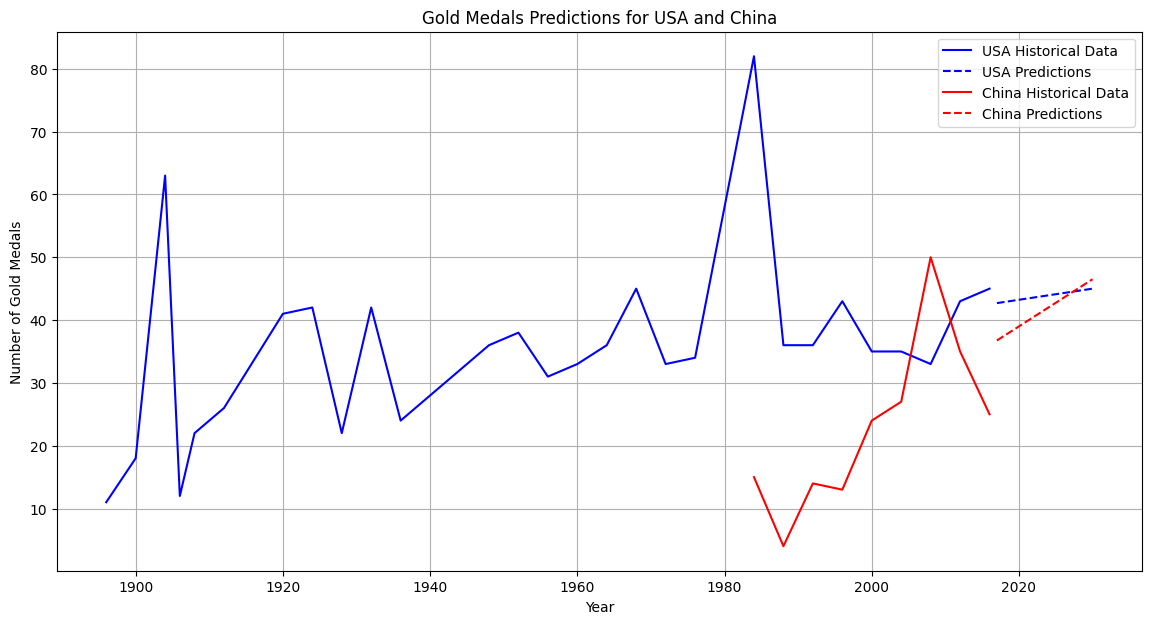

In [200]:
import matplotlib.pyplot as plt

# 2.6 - Plot historical data and predictions for USA
plt.figure(figsize=(14, 7))

plt.plot(usa_gold_medal_count_per_year['Year'], usa_gold_medal_count_per_year['Gold Medals'], color='blue', label='USA Historical Data')
plt.plot(future_usa_df['Year'], future_usa_df['Predicted Gold Medals (USA)'], color='blue', linestyle='--', label='USA Predictions')

# Plot historical data and predictions for China
plt.plot(china_gold_medal_count_per_year['Year'], china_gold_medal_count_per_year['Gold Medals'], color='red', label='China Historical Data')
plt.plot(future_china_df['Year'], future_china_df['Predicted Gold Medals (China)'], color='red', linestyle='--', label='China Predictions')

plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.title('Gold Medals Predictions for USA and China')
plt.legend()
plt.grid(True)
plt.show()


In [201]:
# 3 - Summary - Comparing the numbers between Manual Implement and SKLearn
# 3.1 - Compare for USA and China between 2 implementations for 2030
print(f'USA - From manual implementation: {usa_2030_prediction_manual_impl}')
print(f'USA - From SKLearn implementation: {usa_2030_prediction_sklearn}')

print(f'China - From manual implementation: {china_2030_prediction_manual_impl}')
print(f'China - From SKLearn implementation: {china_2030_prediction_sklearn}')

USA - From manual implementation: 49
USA - From SKLearn implementation: 45
China - From manual implementation: 61
China - From SKLearn implementation: 46
